# Q4 Clustering and dimensionality reduction

# Task Steps:

### Step 1: Load the Wine Dataset and run K-means clustering alogrithm

1.Load the wine data.<br>
2.Create the features(X), scale the features and apply K-means clustering on it<br>
### Step 2: Applying PCA & tSNE to data , using K-means clustering alogrithm on the transformed data for distinguishing the red wines from the white wine

1.Apply PCA & tSNE on the Wine data and reduce the data into 2 components.<br>
2.Run K-means clsutering alogrithm on the PCA & tSNE dataset to find out any improvement than base K-means .<br>

### Step 3: Applying K-means clustering alogrithm on the scaled and transformed data(using PCA & tSNE) to distinguish the higher from the lower quality wines? 

1.Apply K-means cluster on scaled, PCA-reduced and tSNE-reduced data, set n-cluster = 7.<br>
2.Categorize wine quality into High Quality and Low Quality, apply K-means cluster on scaled, PCA-reduced and tSNE-reduced data, set n-cluster = 2.<br>



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from collections import Counter
import matplotlib.pyplot as plt


In [2]:
wine = pd.read_csv('wine.csv')

In [3]:
wine.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [4]:
X = wine.drop(['color','quality'], axis = 1)
y = wine['color']


In [5]:
y.value_counts()

white    4898
red      1599
Name: color, dtype: int64

### Fitting K-means clustering algorithm with n_clusters = 2 on scaled data to find clusters for Wine Color

In [6]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Apply K-means clustering
n_clusters = 2
kmeans_plus = KMeans(n_clusters=n_clusters,init = 'k-means++', random_state=7)
clusters = kmeans_plus.fit_predict(X_scaled)


# Count the occurrences of each cluster label
label_counts = Counter(clusters)

print("Cluster Label Counts:", label_counts)

# Create a dictionary to store target variable distribution for each cluster
target_distribution = {cluster: Counter() for cluster in set(clusters)}

# Populate the target variable distribution dictionary
for cluster, target_value in zip(clusters, y):
    target_distribution[cluster][target_value] += 1

# Print the distribution of target variables in each cluster
for cluster, distribution in target_distribution.items():
    print(f"Cluster {cluster} - Target Variable Distribution: {distribution}")

/Users/anubhavnehru/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Label Counts: Counter({1: 4856, 0: 1641})
Cluster 0 - Target Variable Distribution: Counter({'red': 1575, 'white': 66})
Cluster 1 - Target Variable Distribution: Counter({'white': 4832, 'red': 24})


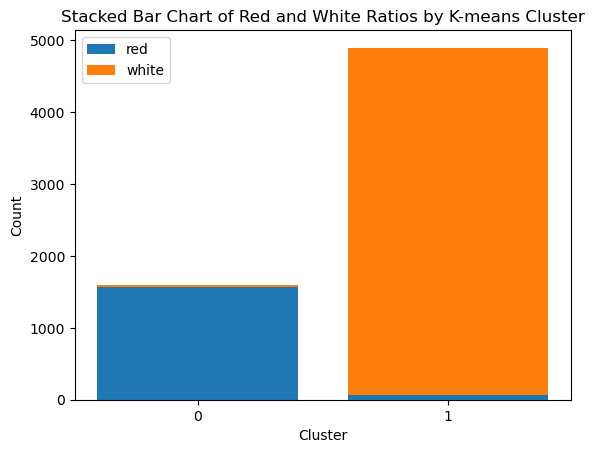

In [8]:
data = target_distribution

# Extract data for plotting
clusters = list(data.keys())
colors = list(data[0].keys())
ratios = [[data[cluster][color] for color in colors] for cluster in clusters]

# Create a stacked bar chart
fig, ax = plt.subplots()
ax.bar(clusters, ratios[0], label=colors[0])
ax.bar(clusters, ratios[1], bottom=ratios[0], label=colors[1])

# Set x-axis tick labels
ax.set_xticks(clusters)
ax.set_xticklabels(clusters)

# Add labels and title
ax.set_xlabel('Cluster')
ax.set_ylabel('Count')
ax.set_title('Stacked Bar Chart of Red and White Ratios by K-means Cluster')

# Add legend
ax.legend()

# Show the plot
plt.show()

K-means clustering algorithm with n_clusters = 2 on scaled data, is doing decently well to create 2 clusters, with only small overlap between Red and White

### Now transforming data using PCA and tSNE, and applying K-means clustering

In [ ]:
n_components = 2

# Apply PCA and t-SNE
pca = PCA(n_components=n_components)
tsne = TSNE(n_components=n_components, random_state=42)

pca_result = pca.fit_transform(X_scaled)
tsne_result = tsne.fit_transform(X_scaled)

# Fit K-means clustering with 2 clusters on PCA data
kmeans_pca = KMeans(n_clusters=2,init = 'k-means++', random_state=42)
clusters_pca = kmeans_pca.fit_predict(pca_result)

# Fit K-means clustering with 2 clusters on t-SNE data
kmeans_tsne = KMeans(n_clusters=2,init = 'k-means++', random_state=42)
clusters_tsne = kmeans_tsne.fit_predict(tsne_result)

# Visualize the results
plt.figure(figsize=(18, 6))


plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters_pca, cmap='coolwarm')
plt.title("K-means Clustering on PCA Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=clusters_tsne, cmap='coolwarm')
plt.title("K-means Clustering on t-SNE Data")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")

plt.tight_layout()
plt.show()


In [ ]:
# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Print explained variance ratio
print(f"Explained Variance Ratio for the first {n_components} components:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Component {i+1}: {ratio:.2f}")

# Create a scree plot
plt.figure(figsize=(8, 5))
plt.bar(range(1, n_components + 1), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot for PCA')
plt.xticks(range(1, n_components + 1))
plt.show()

PCA is unable to explain a strong variance of the base data, with PCA1 only able to explain 0.28 variance of the data

In [ ]:
# Count the occurrences of each cluster label
label_counts = Counter(clusters_pca)

print("Cluster Label Counts:", label_counts)

# Create a dictionary to store target variable distribution for each cluster
target_distribution_pca = {cluster: Counter() for cluster in set(clusters_pca)}

# Populate the target variable distribution dictionary
for cluster, target_value in zip(clusters_pca, y):
    target_distribution_pca[cluster][target_value] += 1

# Print the distribution of target variables in each cluster
for cluster, distribution in target_distribution_pca.items():
    print(f"Cluster {cluster} - Target Variable Distribution: {distribution}")

In [ ]:
data = target_distribution_pca

# Extract data for plotting
clusters = list(data.keys())
colors = list(data[0].keys())
ratios = [[data[cluster][color] for color in colors] for cluster in clusters]

# Create a stacked bar chart
fig, ax = plt.subplots()
ax.bar(clusters, ratios[0], label=colors[0])
ax.bar(clusters, ratios[1], bottom=ratios[0], label=colors[1])

# Set x-axis tick labels
ax.set_xticks(clusters)
ax.set_xticklabels(clusters)

# Add labels and title
ax.set_xlabel('Cluster')
ax.set_ylabel('Count')
ax.set_title('Stacked Bar Chart of Red and White Ratios by PCA Cluster ')

# Add legend
ax.legend()

# Show the plot
plt.show()

K-means clustering on PCA-reduced data is not able to match the performance of K-means clustering on Scaled data, since we can see more number of overlaps between red and wine in the clusters formed by using K-means clustering on PCA-reduced data

In [ ]:
# Count the occurrences of each cluster label
label_counts = Counter(clusters_tsne)

print("Cluster Label Counts:", label_counts)

# Create a dictionary to store target variable distribution for each cluster
target_distribution_tsne = {cluster: Counter() for cluster in set(clusters_tsne)}

# Populate the target variable distribution dictionary
for cluster, target_value in zip(clusters_tsna, y):
    target_distribution_tsne[cluster][target_value] += 1

# Print the distribution of target variables in each cluster
for cluster, distribution in target_distribution_tsne.items():
    print(f"Cluster {cluster} - Target Variable Distribution: {distribution}")

In [ ]:
data = target_distribution_tsna

# Extract data for plotting
clusters = list(data.keys())
colors = list(data[0].keys())
ratios = [[data[cluster][color] for color in colors] for cluster in clusters]

# Create a stacked bar chart
fig, ax = plt.subplots()
ax.bar(clusters, ratios[0], label=colors[0])
ax.bar(clusters, ratios[1], bottom=ratios[0], label=colors[1])

# Set x-axis tick labels
ax.set_xticks(clusters)
ax.set_xticklabels(clusters)

# Add labels and title
ax.set_xlabel('Cluster')
ax.set_ylabel('Count')
ax.set_title('Stacked Bar Chart of Red and White Ratios by TSNE Cluster')

# Add legend
ax.legend()

# Show the plot
plt.show()

K-means clustering on tSNE-reduced data is performing the worst in comparison to K-means on scaled data and K-means on PCA-reduced data.There is a significant overlap between Red and white in this scenario

### Now trying to create clusters for distinguishing Wine Quality using clustering

In [ ]:
wine['quality'].value_counts().sort_values(ascending = False).plot.bar()

Wine quality 6,5 and 7 are dominating the frequency of Wine quality, out of the 7 wine qualities ranging from 3 to 9

In [ ]:
X = wine.drop(['color','quality'], axis = 1)
y = wine['quality']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Initialize an empty list to store inertia values
inertia = []

# Try K values from 1 to 10 (you can adjust this range)
for k in range(1, 25):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

In [ ]:
# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 25), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# Apply K-means clustering
n_clusters = 7
kmeans_plus = KMeans(n_clusters=n_clusters,init = 'k-means++', random_state=7)
clusters = kmeans_plus.fit_predict(X_scaled)


# Count the occurrences of each cluster label
label_counts = Counter(clusters)

print("Cluster Label Counts:", label_counts)

# Create a dictionary to store target variable distribution for each cluster
target_distribution = {cluster: Counter() for cluster in set(clusters)}

# Populate the target variable distribution dictionary
for cluster, target_value in zip(clusters, y):
    target_distribution[cluster][target_value] += 1

# Print the distribution of target variables in each cluster
for cluster, distribution in target_distribution.items():
    print(f"Cluster {cluster} - Target Variable Distribution: {distribution}")

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

data = target_distribution

# Extract data for plotting
clusters = list(data.keys())
subclusters = sorted(set(val for c in data.values() for val in c.keys()))

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bottom = [0] * len(clusters)
for subcluster in subclusters:
    values = [data[cluster].get(subcluster, 0) for cluster in clusters]
    ax.bar(clusters, values, label=f'{subcluster}', bottom=bottom, alpha=0.8)
    bottom = [b + v for b, v in zip(bottom, values)]

# Add labels and title
ax.set_xlabel('Clusters')
ax.set_ylabel('Count')
ax.set_title('Stacked Bar Chart of Clusters Distribution by Subcluster')

# Add legend
ax.legend(loc='upper right')

# Set x-axis labels
plt.xticks(clusters, labels=[f'Cluster {c}' for c in clusters])

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


We are unable to find isolated clusters which will help us distinguish Wine Quality if we train K-means clustering algorithm on Scaled Data with n_clusters = 7

### Let's check fitting clustering using PCA and t-SNE reduced data to create clusters inorder to distinguish Wine quality

In [ ]:
# Apply PCA and t-SNE (replace with your data)
pca = PCA(n_components=2)
tsne = TSNE(n_components=2, random_state=42)

pca_result = pca.fit_transform(X_scaled)
tsne_result = tsne.fit_transform(X_scaled)

# Fit K-means clustering with 7 clusters on PCA data
kmeans_pca = KMeans(n_clusters=7, init='k-means++', random_state=42)
clusters_pca = kmeans_pca.fit_predict(pca_result)

# Fit K-means clustering with 7 clusters on t-SNE data
kmeans_tsne = KMeans(n_clusters=7, init='k-means++', random_state=42)
clusters_tsne = kmeans_tsne.fit_predict(tsne_result)

# Cluster names
cluster_names = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6']

# Visualize the results
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
for i in range(7):
    plt.scatter(pca_result[clusters_pca == i, 0], pca_result[clusters_pca == i, 1], label=cluster_names[i])
plt.title("K-means Clustering on PCA Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()

plt.subplot(1, 2, 2)
for i in range(7):
    plt.scatter(tsne_result[clusters_tsne == i, 0], tsne_result[clusters_tsne == i, 1], label=cluster_names[i])
plt.title("K-means Clustering on t-SNE Data")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Apply K-means clustering
n_clusters_pca = 7
kmeans_plus = KMeans(n_clusters=n_clusters_pca,init = 'k-means++', random_state=7)
clusters_pca = kmeans_plus.fit_predict(pca_result)


# Count the occurrences of each cluster label
label_counts = Counter(clusters_pca)

print("Cluster Label Counts:", label_counts)

# Create a dictionary to store target variable distribution for each cluster
target_distribution_pca = {cluster: Counter() for cluster in set(clusters_pca)}

# Populate the target variable distribution dictionary
for cluster, target_value in zip(clusters_pca, y):
    target_distribution_pca[cluster][target_value] += 1

# Print the distribution of target variables in each cluster
for cluster, distribution in target_distribution_pca.items():
    print(f"Cluster {cluster} - Target Variable Distribution: {distribution}")

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

data = target_distribution_pca

# Extract data for plotting
clusters = list(data.keys())
subclusters = sorted(set(val for c in data.values() for val in c.keys()))

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bottom = [0] * len(clusters)
for subcluster in subclusters:
    values = [data[cluster].get(subcluster, 0) for cluster in clusters]
    ax.bar(clusters, values, label=f'{subcluster}', bottom=bottom, alpha=0.8)
    bottom = [b + v for b, v in zip(bottom, values)]

# Add labels and title
ax.set_xlabel('Clusters')
ax.set_ylabel('Count')
ax.set_title('Stacked Bar Chart of Clusters Distribution by Subcluster')

# Add legend
ax.legend(loc='upper right')

# Set x-axis labels
plt.xticks(clusters, labels=[f'Cluster {c}' for c in clusters])

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Apply K-means clustering
n_clusters_tsne = 7
kmeans_plus = KMeans(n_clusters=n_clusters_tsne,init = 'k-means++', random_state=7)
clusters_tsne = kmeans_plus.fit_predict(tsne_result)


# Count the occurrences of each cluster label
label_counts = Counter(clusters_tsne)

print("Cluster Label Counts:", label_counts)

# Create a dictionary to store target variable distribution for each cluster
target_distribution_tsne = {cluster: Counter() for cluster in set(clusters_tsne)}

# Populate the target variable distribution dictionary
for cluster, target_value in zip(clusters_tsne, y):
    target_distribution_tsne[cluster][target_value] += 1

# Print the distribution of target variables in each cluster
for cluster, distribution in target_distribution_tsne.items():
    print(f"Cluster {cluster} - Target Variable Distribution: {distribution}")

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

data = target_distribution_tsne

# Extract data for plotting
clusters = list(data.keys())
subclusters = sorted(set(val for c in data.values() for val in c.keys()))

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bottom = [0] * len(clusters)
for subcluster in subclusters:
    values = [data[cluster].get(subcluster, 0) for cluster in clusters]
    ax.bar(clusters, values, label=f'{subcluster}', bottom=bottom, alpha=0.8)
    bottom = [b + v for b, v in zip(bottom, values)]

# Add labels and title
ax.set_xlabel('Clusters')
ax.set_ylabel('Count')
ax.set_title('Stacked Bar Chart of Clusters Distribution by Subcluster')

# Add legend
ax.legend(loc='upper right')

# Set x-axis labels
plt.xticks(clusters, labels=[f'Cluster {c}' for c in clusters])

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


For both PCA and t-SNE reduced data, if we apply K-means clustering algorithm with n_clusters = 7, we are not getting good results, as there is a lot of overlap of ratings across all the clusters

### Let's try to classify Wine Quality based on Category - Good or Bad

In [ ]:
wine['quality'].describe()

Median value for quality of wine = 6

In [ ]:
wine['Wine Quality'] = np.where(wine['quality'] <=6, 'Low Quality' , 'High Quality')
wine['Color_Quality'] = wine.color + '_' + wine['Wine Quality']

In [ ]:
X = wine.drop(['color','quality','Wine Quality','Color_Quality'], axis = 1)
y = wine['Wine Quality']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Apply K-means clustering
n_clusters = 2
kmeans_plus = KMeans(n_clusters=n_clusters,init = 'k-means++', random_state=7)
clusters = kmeans_plus.fit_predict(X_scaled)


# Count the occurrences of each cluster label
label_counts = Counter(clusters)

print("Cluster Label Counts:", label_counts)

# Create a dictionary to store target variable distribution for each cluster
target_distribution = {cluster: Counter() for cluster in set(clusters)}

# Populate the target variable distribution dictionary
for cluster, target_value in zip(clusters, y):
    target_distribution[cluster][target_value] += 1

# Print the distribution of target variables in each cluster
for cluster, distribution in target_distribution.items():
    print(f"Cluster {cluster} - Target Variable Distribution: {distribution}")

In [ ]:
data = target_distribution

# Extract data for plotting
clusters = list(data.keys())
colors = list(data[0].keys())
ratios = [[data[cluster][color] for color in colors] for cluster in clusters]

# Create a stacked bar chart
fig, ax = plt.subplots()
ax.bar(clusters, ratios[0], label=colors[0])
ax.bar(clusters, ratios[1], bottom=ratios[0], label=colors[1])

# Set x-axis tick labels
ax.set_xticks(clusters)
ax.set_xticklabels(clusters)

# Add labels and title
ax.set_xlabel('Cluster')
ax.set_ylabel('Count')
ax.set_title('Stacked Bar Chart of Red and White Ratios by K-means Cluster')

# Add legend
ax.legend()

# Show the plot
plt.show()

In [ ]:
# Apply PCA and t-SNE (replace with your data)
pca = PCA(n_components=2)
tsne = TSNE(n_components=2, random_state=42)

pca_result = pca.fit_transform(X_scaled)
tsne_result = tsne.fit_transform(X_scaled)

# Fit K-means clustering with 7 clusters on PCA data
kmeans_pca = KMeans(n_clusters=2, init='k-means++', random_state=42)
clusters_pca = kmeans_pca.fit_predict(pca_result)

# Fit K-means clustering with 7 clusters on t-SNE data
kmeans_tsne = KMeans(n_clusters=2, init='k-means++', random_state=42)
clusters_tsne = kmeans_tsne.fit_predict(tsne_result)

# Cluster names
cluster_names = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6']

# Visualize the results
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
for i in range(7):
    plt.scatter(pca_result[clusters_pca == i, 0], pca_result[clusters_pca == i, 1], label=cluster_names[i])
plt.title("K-means Clustering on PCA Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()

plt.subplot(1, 2, 2)
for i in range(7):
    plt.scatter(tsne_result[clusters_tsne == i, 0], tsne_result[clusters_tsne == i, 1], label=cluster_names[i])
plt.title("K-means Clustering on t-SNE Data")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Count the occurrences of each cluster label
label_counts = Counter(clusters_pca)

print("Cluster Label Counts:", label_counts)

# Create a dictionary to store target variable distribution for each cluster
target_distribution_pca = {cluster: Counter() for cluster in set(clusters_pca)}

# Populate the target variable distribution dictionary
for cluster, target_value in zip(clusters_pca, y):
    target_distribution_pca[cluster][target_value] += 1

# Print the distribution of target variables in each cluster
for cluster, distribution in target_distribution_pca.items():
    print(f"Cluster {cluster} - Target Variable Distribution: {distribution}")

In [ ]:
data = target_distribution_pca

# Extract data for plotting
clusters = list(data.keys())
colors = list(data[0].keys())
ratios = [[data[cluster][color] for color in colors] for cluster in clusters]

# Create a stacked bar chart
fig, ax = plt.subplots()
ax.bar(clusters, ratios[0], label=colors[0])
ax.bar(clusters, ratios[1], bottom=ratios[0], label=colors[1])

# Set x-axis tick labels
ax.set_xticks(clusters)
ax.set_xticklabels(clusters)

# Add labels and title
ax.set_xlabel('Cluster')
ax.set_ylabel('Count')
ax.set_title('Stacked Bar Chart of Red and White Ratios by PCA Cluster ')

# Add legend
ax.legend()

# Show the plot
plt.show()

In [ ]:
# Count the occurrences of each cluster label
label_counts = Counter(clusters_tsne)

print("Cluster Label Counts:", label_counts)

# Create a dictionary to store target variable distribution for each cluster
target_distribution_tsne = {cluster: Counter() for cluster in set(clusters_tsne)}

# Populate the target variable distribution dictionary
for cluster, target_value in zip(clusters_tsna, y):
    target_distribution_tsne[cluster][target_value] += 1

# Print the distribution of target variables in each cluster
for cluster, distribution in target_distribution_tsne.items():
    print(f"Cluster {cluster} - Target Variable Distribution: {distribution}")

In [ ]:
data = target_distribution_tsna

# Extract data for plotting
clusters = list(data.keys())
colors = list(data[0].keys())
ratios = [[data[cluster][color] for color in colors] for cluster in clusters]

# Create a stacked bar chart
fig, ax = plt.subplots()
ax.bar(clusters, ratios[0], label=colors[0])
ax.bar(clusters, ratios[1], bottom=ratios[0], label=colors[1])

# Set x-axis tick labels
ax.set_xticks(clusters)
ax.set_xticklabels(clusters)

# Add labels and title
ax.set_xlabel('Cluster')
ax.set_ylabel('Count')
ax.set_title('Stacked Bar Chart of Red and White Ratios by TSNE Cluster')

# Add legend
ax.legend()

# Show the plot
plt.show()

Even after classifying Wine Quality into High and Low quality, we are unable to create significant clusters which which will help us distinguish between the quality of Wine. We tried to apply K-means on Scaled data as well as PCA-reduced and t-SNE reduced data, yet the clusters formed are having significant overlap between the quality type as seen in the stacked bar plots, plotted above

#### Wine Colour Quality

In [ ]:
X = wine.drop(['color','quality','Wine Quality','Color_Quality'], axis = 1)
y = wine['Color_Quality']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Apply K-means clustering
n_clusters = 4
kmeans_plus = KMeans(n_clusters=n_clusters,init = 'k-means++', random_state=7)
clusters = kmeans_plus.fit_predict(X_scaled)


# Count the occurrences of each cluster label
label_counts = Counter(clusters)

print("Cluster Label Counts:", label_counts)

# Create a dictionary to store target variable distribution for each cluster
target_distribution = {cluster: Counter() for cluster in set(clusters)}

# Populate the target variable distribution dictionary
for cluster, target_value in zip(clusters, y):
    target_distribution[cluster][target_value] += 1

# Print the distribution of target variables in each cluster
for cluster, distribution in target_distribution.items():
    print(f"Cluster {cluster} - Target Variable Distribution: {distribution}")

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

data = target_distribution

# Extract data for plotting
clusters = list(data.keys())
subclusters = sorted(set(val for c in data.values() for val in c.keys()))

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bottom = [0] * len(clusters)
for subcluster in subclusters:
    values = [data[cluster].get(subcluster, 0) for cluster in clusters]
    ax.bar(clusters, values, label=f'{subcluster}', bottom=bottom, alpha=0.8)
    bottom = [b + v for b, v in zip(bottom, values)]

# Add labels and title
ax.set_xlabel('Clusters')
ax.set_ylabel('Count')
ax.set_title('Stacked Bar Chart of Clusters Distribution by Subcluster')

# Add legend
ax.legend(loc='upper right')

# Set x-axis labels
plt.xticks(clusters, labels=[f'Cluster {c}' for c in clusters])

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Apply PCA and t-SNE
pca = PCA(n_components=2)
tsne = TSNE(n_components=2, random_state=42)

pca_result = pca.fit_transform(X_scaled)
tsne_result = tsne.fit_transform(X_scaled)

# Fit K-means clustering with 2 clusters on PCA data
kmeans_pca = KMeans(n_clusters=4,init = 'k-means++', random_state=42)
clusters_pca = kmeans_pca.fit_predict(pca_result)

# Fit K-means clustering with 2 clusters on t-SNE data
kmeans_tsne = KMeans(n_clusters=4,init = 'k-means++', random_state=42)
clusters_tsne = kmeans_tsne.fit_predict(tsne_result)

# Visualize the results
plt.figure(figsize=(18, 6))


plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters_pca, cmap='coolwarm')
plt.title("K-means Clustering on PCA Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=clusters_tsne, cmap='coolwarm')
plt.title("K-means Clustering on t-SNE Data")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend()

plt.tight_layout()
plt.show()
